# Introduction
In this notebook we will build a CNN to classify flower images. We will also see how our model overfits and how overfitting can be addressed using data augmentation. Data augmentation is a process of generating new training samples from current training dataset using transformations such as zoom, rotations, change in contrast and so much more

### Model Performance

| Model Type | Dataset | Accuracy |
|---|---|---|
| Simple CNN | Training | 99% |
| Augmented CNN | Training | 80% |
| Simple CNN | Test | 66% |
| Augmented CNN |Test | 72%

## Experiment Summary

### Experiment Details
* **Number of Epochs:** 15
* **Technique Used:** Data Augmentation

# Importing Libaries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL # used to display image
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# Downloading and Loading Flower Dataset

In [2]:
#dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz" # link of dataset
#data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True) # untar true will unzip it

# cache_dir indicates where to download data the '.' means current directory

In [3]:
data_dir='.\\datasets\\flower_photos' #defining path because dataset already downloaded

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [5]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [7]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

# Visualizing Images

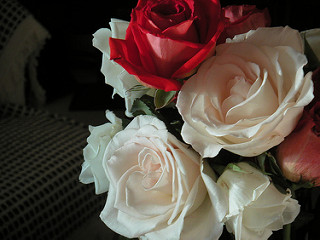

In [8]:
PIL.Image.open(str(roses[1]))

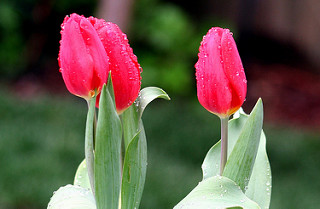

In [9]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

# Preparing Dataset for classification

In [10]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [11]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [12]:
flowers_images_dict['roses'][:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [13]:
str(flowers_images_dict['roses'][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [14]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

### Reshapping

In [15]:
img.shape

(240, 179, 3)

In [16]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

### Loading all Images with labels

In [17]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [18]:
X = np.array(X)
y = np.array(y)

# Spliting Dataset

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Nomralizing Images

In [20]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

# Building CNN without Augumentation

In [21]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
cnn_history=model.fit(X_train_scaled, y_train, epochs=15)              




Epoch 1/15


86/86 [==============================] - 22s 241ms/step - loss: 1.2979 - accuracy: 0.4430
Epoch 2/15
86/86 [==============================] - 21s 240ms/step - loss: 0.9917 - accuracy: 0.6166
Epoch 3/15
86/86 [==============================] - 21s 240ms/step - loss: 0.8303 - accuracy: 0.6839
Epoch 4/15
86/86 [==============================] - 21s 240ms/step - loss: 0.6441 - accuracy: 0.7558
Epoch 5/15
86/86 [==============================] - 21s 241ms/step - loss: 0.4463 - accuracy: 0.8499
Epoch 6/15
86/86 [==============================] - 21s 240ms/step - loss: 0.2638 - accuracy: 0.9150
Epoch 7/15
86/86 [==============================] - 21s 240ms/step - loss: 0.1591 - accuracy: 0.9520
Epoch 8/15
86/86 [==============================] - 21s 241ms/step - loss: 0.0870 - accuracy: 0.9767
Epoch 9/15
86/86 [==============================] - 21s 242ms/step - loss: 0.0590 - accuracy: 0.9844
Epoch 10/15
86/86 [==============================] - 21s 239ms/step - loss: 0.0596 - a

In [22]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 2s 56ms/step - loss: 2.1660 - accuracy: 0.6645


[2.166029691696167, 0.6644880175590515]

In [23]:
predictions = model.predict(X_test_scaled)
predictions

29/29 [==============================] - 2s 56ms/step


array([[  4.1821265,  27.105661 ,   7.658756 , -13.4226465,  -3.1734695],
       [ 12.033389 ,   4.739131 ,  -8.119203 ,  -6.4408965,   3.2881768],
       [ -3.0897138,   2.8342056,  15.930747 , -14.201858 ,  -2.6941674],
       ...,
       [ -1.4168422,  -1.7334037, -11.403067 ,   9.570566 ,   2.26619  ],
       [  5.0695586,  10.920035 ,   2.4366539,  -3.2837808,  -5.0923505],
       [ -5.606515 , -16.69229  ,  -0.5632905,   6.414507 ,   3.756782 ]],
      dtype=float32)

# Improve Accuracy Using Data Augmentation

In [24]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(180, 
                                                              180,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

# Visualizing Original Image vs Fliped Image using Augmentation

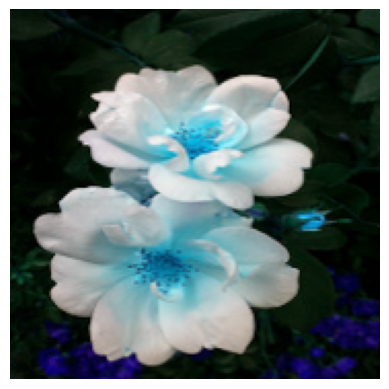

In [25]:
plt.axis('off')
plt.imshow(X[0])

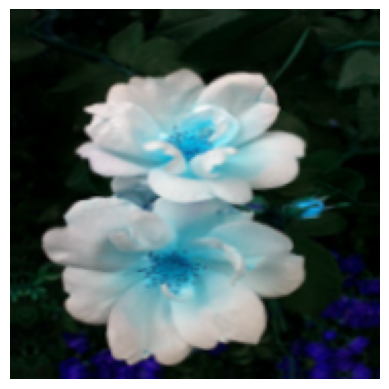

In [26]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

# Build CNN with Augmentation

In [27]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
aug_history=model.fit(X_train_scaled, y_train, epochs=15)    

Epoch 1/15
86/86 [==============================] - 30s 320ms/step - loss: 1.2828 - accuracy: 0.4688
Epoch 2/15
86/86 [==============================] - 28s 325ms/step - loss: 1.0566 - accuracy: 0.5723
Epoch 3/15
86/86 [==============================] - 28s 321ms/step - loss: 0.9234 - accuracy: 0.6377
Epoch 4/15
86/86 [==============================] - 28s 322ms/step - loss: 0.8424 - accuracy: 0.6770
Epoch 5/15
86/86 [==============================] - 27s 317ms/step - loss: 0.7881 - accuracy: 0.6890
Epoch 6/15
86/86 [==============================] - 27s 315ms/step - loss: 0.7448 - accuracy: 0.7082
Epoch 7/15
86/86 [==============================] - 27s 315ms/step - loss: 0.7262 - accuracy: 0.7177
Epoch 8/15
86/86 [==============================] - 27s 317ms/step - loss: 0.6693 - accuracy: 0.7464
Epoch 9/15
86/86 [==============================] - 27s 314ms/step - loss: 0.6477 - accuracy: 0.7558
Epoch 10/15
86/86 [==============================] - 27s 313ms/step - loss: 0.6162 - accura

In [28]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 2s 57ms/step - loss: 0.7352 - accuracy: 0.7298


[0.7351550459861755, 0.7298474907875061]